In [1]:
# (inscrutable setup mumbo-jumbo)

%matplotlib inline

import numpy as np
import requests
import imageio
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from os.path import exists
from matplotlib import animation
from numba import jit as execute_quickly

import youtube_dl

/home/andreas/src/env-3.6/lib/python3.6/site-packages/numba/errors.py:102: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
if 1:
    video_url = None
    video_filename = "basketball-bounce.mp4"

    if not exists(video_filename):
        ydl_opts = {"outtmpl": video_filename}
        with youtube_dl.YoutubeDL(ydl_opts) as ydl:
            ydl.download(["https://www.youtube.com/watch?v=ZvgJ7mVxeg0"])

    fps = 24
    start_frame = int(3.5*fps)
    stop_frame = int(5.5*fps)

In [5]:
if video_url is not None and not exists(video_filename):
    r = requests.get(video_url, stream=True)
    r.raise_for_status()

    size = 0
    with open(video_filename, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=1024*1024):
            print(".", end="", flush=True)
            size += len(chunk)
            fd.write(chunk)
    print()
    print(f"received {size/1024/1024:.1f} MB...")

    print("done")

In [6]:
vid_reader = imageio.get_reader(video_filename,  'ffmpeg')

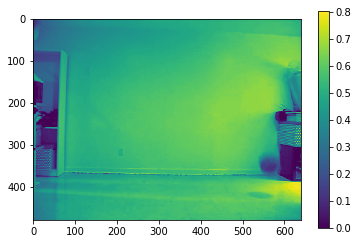

In [7]:
def get_frame(frame_nr):
    img = Image.fromarray(vid_reader.get_data(frame_nr)).convert("L")
    return np.array(img, dtype=np.float32)/255

def get_framediff(frame_nr):
    return get_frame(frame_nr+1) - np.array(get_frame(frame_nr), dtype=np.float32)

plt.imshow(get_frame(int(5.5*fps)))
plt.colorbar()

In [8]:
nframes = stop_frame - start_frame

pos = np.zeros((2, nframes))

for i in range(nframes):
    print(f"{i}/{nframes}")
    fd = get_framediff(start_frame + i)
    ys, xs = np.where(abs(np.minimum(fd, 0)) > 0.15)
    pos[0, i] = np.median(xs)
    pos[1, i] = np.median(ys)

0/48
1/48
2/48
3/48
4/48
5/48
6/48
7/48
8/48
9/48
10/48
11/48
12/48
13/48
14/48
15/48
16/48
17/48
18/48
19/48
20/48
21/48
22/48
23/48
24/48
25/48
26/48
27/48
28/48
29/48
30/48
31/48
32/48
33/48
34/48
35/48
36/48
37/48
38/48
39/48
40/48
41/48
42/48
43/48
44/48
45/48
46/48
47/48


In [10]:
pos.T

array([[ 76. , 212. ],
       [ 83. , 237. ],
       [ 90. , 258. ],
       [ 96.5, 281. ],
       [110. , 330. ],
       [119. , 363. ],
       [131. , 386. ],
       [136. , 345. ],
       [152. , 301. ],
       [164. , 275. ],
       [174. , 255. ],
       [184. , 237. ],
       [199. , 213. ],
       [216. , 194. ],
       [227. , 185. ],
       [237. , 179. ],
       [250. , 175. ],
       [266. , 180. ],
       [274. , 184. ],
       [283. , 191. ],
       [294. , 203. ],
       [305. , 218. ],
       [312. , 229. ],
       [320. , 242. ],
       [333. , 271. ],
       [343. , 297. ],
       [351. , 319. ],
       [359. , 344. ],
       [372. , 393. ],
       [385. , 364. ],
       [392. , 345. ],
       [401. , 323. ],
       [417. , 289. ],
       [430. , 267. ],
       [440. , 253. ],
       [450. , 240. ],
       [465. , 229. ],
       [482. , 221. ],
       [491. , 222. ],
       [500. , 227. ],
       [512. , 238. ],
       [524. , 251. ],
       [530. , 261. ],
       [535

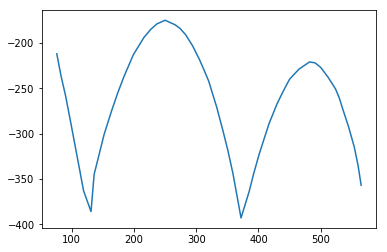

In [8]:
plt.plot(pos[0], -pos[1])

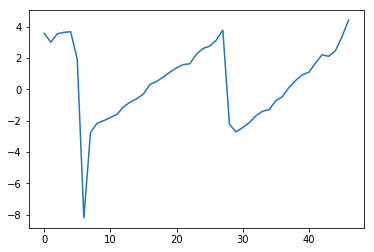

In [12]:
xdiff = np.diff(pos[0])
slope = np.diff(pos[1])/xdiff

plt.plot(slope)

(-0.1, 0.1)

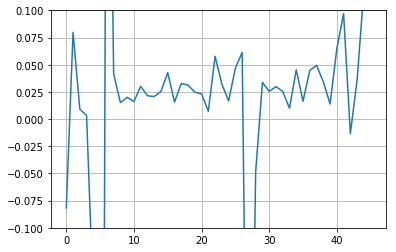

In [15]:
centerpts = pos[0, :-1] + xdiff*0.5

slope_slope = np.diff(slope)/np.diff(centerpts)
plt.plot(slope_slope)
plt.grid()
plt.ylim([-0.1, 0.1])

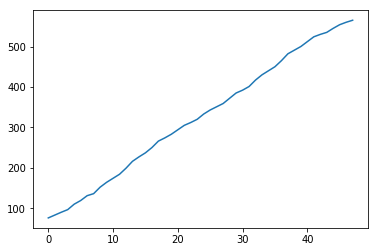

In [11]:
plt.plot(pos[0])